## Handling Null Values

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv('../data/datasets/Bondora_preprocessed.csv', low_memory=False)
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,...,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NrOfScheduledPayments,Defaulted
0,970,1150,5.0,Old_customer,Income_expenses_verified,Estonian,53,Female,EE,2125.0,...,969.16,1187.91,1155.84,433.60,1.0,500.0,590.95,0.0,NaN,Defaulted
1,1295,0,1705.0,Old_customer,Income_unverified,Estonian,50,Female,EE,3000.0,...,563.59,360.07,2436.41,2291.82,1.0,1800.0,445.26,1.0,NaN,Defaulted
2,2700,565,5835.0,New_customer,Income_expenses_verified,Estonian,44,Male,EE,10630.0,...,6537.00,1708.47,0.00,0.00,0.0,0.0,0.00,0.0,NaN,Not Defaulted
3,1115,0,385.0,New_customer,Income_verified,Spanish,42,Male,ES,1500.0,...,464.73,355.92,1035.27,2833.83,0.0,0.0,0.00,1.0,NaN,Defaulted
4,305,0,785.0,New_customer,Income_expenses_verified,Spanish,34,Female,ES,1595.0,...,0.01,0.00,1089.99,4215.37,0.0,0.0,0.00,0.0,NaN,Defaulted


In [3]:
categorical = df.select_dtypes("object")
categorical.isnull().sum()

NewCreditCustomer                        0
VerificationType                        50
LanguageCode                             0
Gender                                  45
Country                                  0
UseOfLoan                                0
Education                               50
MaritalStatus                           50
EmploymentStatus                       202
EmploymentDurationCurrentEmployer     1026
OccupationArea                          91
HomeOwnershipType                     1657
Rating                                2732
Restructured                             0
WorseLateCategory                    23189
CreditScoreEsMicroL                  28161
Defaulted                                0
dtype: int64

All the null values for categorical variables would be renamed as "Unknown"

In [4]:
categorical = categorical.fillna("Unknown")
categorical.isnull().sum()

NewCreditCustomer                    0
VerificationType                     0
LanguageCode                         0
Gender                               0
Country                              0
UseOfLoan                            0
Education                            0
MaritalStatus                        0
EmploymentStatus                     0
EmploymentDurationCurrentEmployer    0
OccupationArea                       0
HomeOwnershipType                    0
Rating                               0
Restructured                         0
WorseLateCategory                    0
CreditScoreEsMicroL                  0
Defaulted                            0
dtype: int64

In [5]:
df = df.drop(categorical, axis=1)
df.isnull().sum()

BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
Age                                           0
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             6660
IncomeTotal                                   0
ExistingLiabilities                           0
LiabilitiesTotal                              0
RefinanceLiabilities                          0
DebtToIncome                                 50
FreeCash                                     50
MonthlyPaymentDay                             0
ActiveScheduleFirstPaymentReached             0
PlannedInterestTillDate                       0
ExpectedLoss                               2638
LossGivenDefault                           2638
ExpectedReturn                          

In [6]:
df = df.fillna(df.mean())
df.isnull().sum()

BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
Age                                       0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
IncomeTotal                               0
ExistingLiabilities                       0
LiabilitiesTotal                          0
RefinanceLiabilities                      0
DebtToIncome                              0
FreeCash                                  0
MonthlyPaymentDay                         0
ActiveScheduleFirstPaymentReached         0
PlannedInterestTillDate                   0
ExpectedLoss                              0
LossGivenDefault                          0
ExpectedReturn                            0
ProbabilityOfDefault                      0
PrincipalOverdueBySchedule      

Now, we will encode categorical variables via Label Encoder method

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical.columns:
    categorical[col] = label_encoder.fit_transform(categorical[col])

categorical.head()

,NewCreditCustomer,VerificationType,LanguageCode,Gender,Country,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,Restructured,WorseLateCategory,CreditScoreEsMicroL,Defaulted
0,1,0,1,0,0,7,3,0,3,0,12,7,3,0,4,11,0
1,1,1,1,0,0,3,1,0,0,0,16,7,2,0,4,11,0
2,0,0,1,1,0,3,3,1,0,7,17,5,0,0,4,11,1
3,0,3,6,1,1,7,0,2,1,9,12,4,6,0,4,4,0
4,0,0,6,0,1,9,3,1,3,5,12,9,7,0,4,6,0


In [8]:
df = df.join(categorical)
df.shape

(121461, 51)

<Axes: >

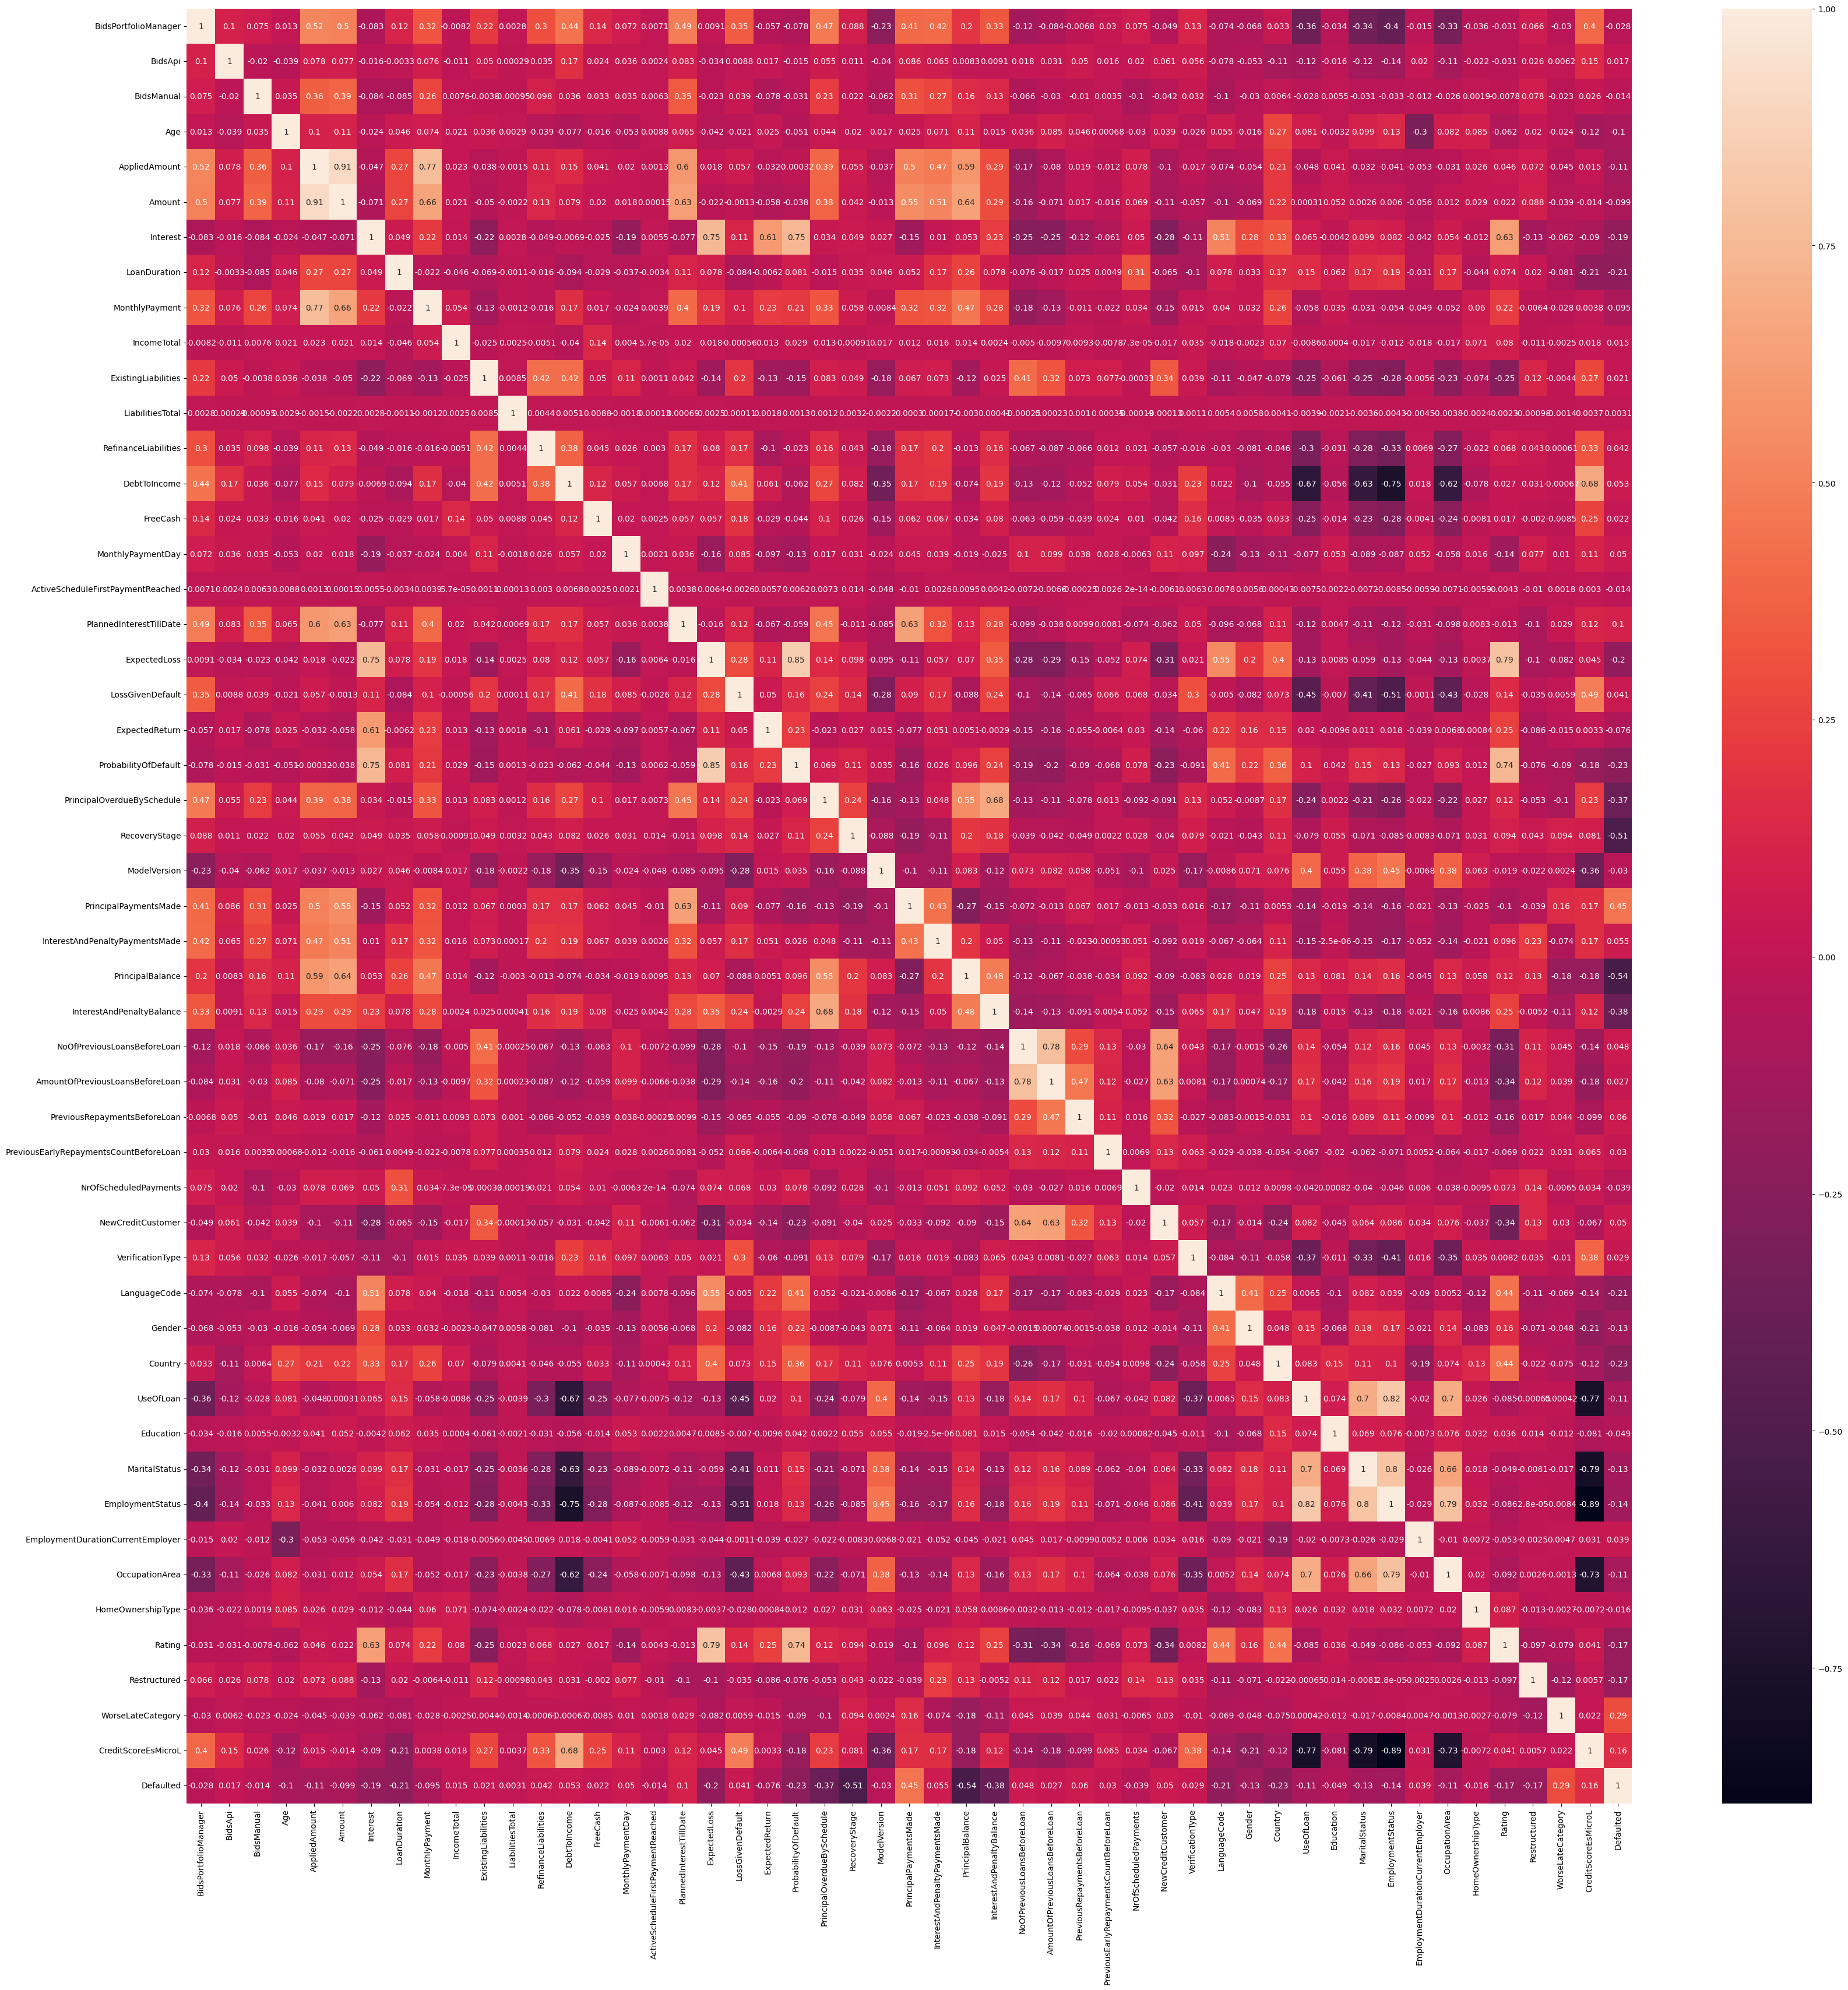

In [9]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot=True)

In the preprocessing stage of the dataset we have indicated "Defaulted" feature to be a target variable. In order to identify features that are most relevant to a target variable, and reduce the dimension of the dataset we will use Mutual Information.  (add why MI)

In [10]:
from sklearn.feature_selection import mutual_info_classif

X = df.copy()
y = X.pop("Defaulted")

disc_feat = X.dtypes == int

MI_ranking = mutual_info_classif(X, y, discrete_features=disc_feat)
MI_ranking = pd.Series(MI_ranking, name = "Mutual Info Ranking", index=X.columns)
MI_ranking = MI_ranking.sort_values(ascending=False)

MI_ranking

InterestAndPenaltyBalance                 0.605311
PrincipalBalance                          0.497295
WorseLateCategory                         0.423289
PrincipalOverdueBySchedule                0.403108
PrincipalPaymentsMade                     0.378016
RecoveryStage                             0.259313
NrOfScheduledPayments                     0.216189
PlannedInterestTillDate                   0.120936
ProbabilityOfDefault                      0.105833
ExpectedLoss                              0.091668
ExpectedReturn                            0.082335
LossGivenDefault                          0.071346
MonthlyPayment                            0.067594
Interest                                  0.060480
InterestAndPenaltyPaymentsMade            0.045286
LanguageCode                              0.039945
Country                                   0.039473
Rating                                    0.038247
AppliedAmount                             0.036911
LoanDuration                   

First 15 features with the highest MI Score will be selected to proceed with the ML models.

Text(0, 0.5, 'Features')

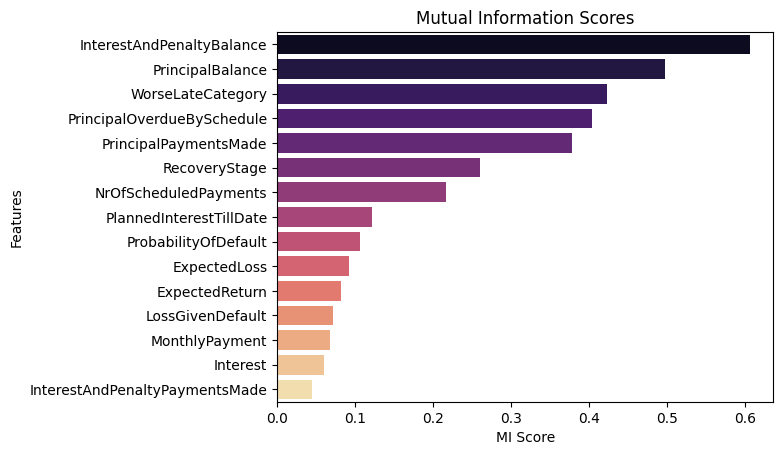

In [11]:
sns.barplot(x=MI_ranking.values[:15], y=MI_ranking.index[:15], orient='h', palette="magma")
plt.title('Mutual Information Scores')
plt.xlabel('MI Score')
plt.ylabel('Features')

In [12]:
MI_selected = ['InterestAndPenaltyBalance',
 'PrincipalBalance',
 'WorseLateCategory',
 'PrincipalOverdueBySchedule',
 'PrincipalPaymentsMade',
 'RecoveryStage',
 'NrOfScheduledPayments',
 'PlannedInterestTillDate',
 'ProbabilityOfDefault',
 'ExpectedLoss',
 'ExpectedReturn',
 'LossGivenDefault',
 'MonthlyPayment',
 'Interest',
 'InterestAndPenaltyPaymentsMade']

In [13]:
df.shape

(121461, 51)

## Modelling and Prediction

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score

from codecarbon import EmissionsTracker
import psutil
import GPUtil
import time


In [15]:
def get_cpu():
    return psutil.cpu_percent(interval=1)

def get_gpu():
    gpus = GPUtil.getGPUs()
    print("GPU:", gpus)
    if len(gpus) > 0:
        return sum(gpu.load for gpu in gpus) / len(gpus) * 100
    else:
        return 0


def get_ram():
    memory = psutil.virtual_memory()
    return memory.used / (1024**3)

In [16]:
df["Defaulted"] = label_encoder.fit_transform(df["Defaulted"])
X = df[MI_selected]
y = df["Defaulted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

skf = StratifiedKFold(n_splits=5)


In [17]:
def analyze(model, name):
    tracker = EmissionsTracker()
    tracker.start()

    # cpu_use = []
    # gpu_use = []
    # ram_use = []

    # start = time.time()
    model.fit(X_train, y_train)
    # end = time.time()

    tracker.stop()

    emission = tracker.final_emissions
    energy = tracker._total_energy.kWh
    cpu_use = tracker._total_cpu_energy.kWh
    gpu_use = get_gpu()
    ram_use = tracker._total_ram_energy.kWh

    emission = tracker.final_emissions
    energy = tracker._total_energy.kWh

    y_predict = model.predict(X_test)
    y_predict = model.predict(X_test)
    y_predict_probability = model.predict_proba(X_test)[:, 1]
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    auc = roc_auc_score(y_test, y_predict_probability)

    return {
        "Model" : name, "Precision" : precision, "Recall" : recall, "AUC" : auc,
        "Confusion matrix" : confusion_matrix(y_test, y_predict),
        "Energy consumption (kWh)" : energy, "Carbon Emissions (kg CO2)" : emission,
        "CPU usage (kWh)" : cpu_use, 
        "GPU usage (%)" : gpu_use, 
        "Memory usage (kWh)" : ram_use
    }

### Decision Tree

In [18]:
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_model.fit(X = X_train, y =  y_train)

param_grid = {'max_depth': range(1, 11)}


In [19]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
best_score = grid_search.best_score_

print(f'Best max_depth: {best_max_depth}')
print(f'Best cross-validation score: {best_score}')

Best max_depth: 8
Best cross-validation score: 0.9970257717053392


In [20]:
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=best_max_depth, random_state=42)
result_dt = analyze(dt_model, "Decision Tree")

[codecarbon WARNING @ 23:23:53] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 23:23:53] [setup] RAM Tracking...
[codecarbon INFO @ 23:23:53] [setup] GPU Tracking...
[codecarbon INFO @ 23:23:54] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 23:23:54] [setup] CPU Tracking...
[codecarbon WARNING @ 23:23:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 23:23:56] We saw that you have a 13th Gen Intel(R) Core(TM) i7-13700H but we don't know it. Please contact us.
[codecarbon INFO @ 23:23:56] CPU Model on constant consumption mode: 13th Gen Intel(R) Core(TM) i7-13700H
[codecarbon WARNING @ 23:23:56] Failed to retrieve gpu information
Traceback (most recent call last):
  File "c:\Users\kathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\codecarbon\core\gpu.py", line 238, in get_gpu_details
    devices_info.append(gpu_device.get_gpu_details())
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:

GPU: [<GPUtil.GPUtil.GPU object at 0x000002AB11886C00>]


### Random Forest

In [21]:
rf_model = RandomForestClassifier(random_state=42)
result_rf = analyze(rf_model, "Random Forest")

[codecarbon WARNING @ 23:24:01] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 23:24:01] [setup] RAM Tracking...
[codecarbon INFO @ 23:24:01] [setup] GPU Tracking...
[codecarbon INFO @ 23:24:01] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 23:24:01] [setup] CPU Tracking...
[codecarbon WARNING @ 23:24:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 23:24:02] We saw that you have a 13th Gen Intel(R) Core(TM) i7-13700H but we don't know it. Please contact us.
[codecarbon INFO @ 23:24:02] CPU Model on constant consumption mode: 13th Gen Intel(R) Core(TM) i7-13700H
[codecarbon WARNING @ 23:24:03] Failed to retrieve gpu information
Traceback (most recent call last):
  File "c:\Users\kathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\codecarbon\core\gpu.py", line 238, in get_gpu_details
    devices_info.append(gpu_device.get_gpu_details())
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:

GPU: [<GPUtil.GPUtil.GPU object at 0x000002AB080B5A90>]


### Logistic Regression

In [22]:
lr_model = LogisticRegression()
result_lr = analyze(lr_model, "Logistic Regression")

[codecarbon WARNING @ 23:24:17] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 23:24:17] [setup] RAM Tracking...
[codecarbon INFO @ 23:24:17] [setup] GPU Tracking...
[codecarbon INFO @ 23:24:17] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 23:24:17] [setup] CPU Tracking...
[codecarbon WARNING @ 23:24:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 23:24:19] We saw that you have a 13th Gen Intel(R) Core(TM) i7-13700H but we don't know it. Please contact us.
[codecarbon INFO @ 23:24:19] CPU Model on constant consumption mode: 13th Gen Intel(R) Core(TM) i7-13700H
[codecarbon INFO @ 23:24:19] >>> Tracker's metadata:
[codecarbon INFO @ 23:24:19]   Platform system: Windows-11-10.0.22631-SP0
[codecarbon INFO @ 23:24:19]   Python version: 3.12.4
[codecarbon INFO @ 23:24:19]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 23:24:19]   Available RAM : 31.680 GB
[codecarbon INFO @ 23:24:19]   CPU count: 20
[codecarbon IN

GPU: [<GPUtil.GPUtil.GPU object at 0x000002AB114F61E0>]


### XGBoost

In [23]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
result_xgb = analyze(xgb_model, "XGBoost")

[codecarbon WARNING @ 23:24:22] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 23:24:22] [setup] RAM Tracking...
[codecarbon INFO @ 23:24:22] [setup] GPU Tracking...
[codecarbon INFO @ 23:24:22] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 23:24:22] [setup] CPU Tracking...
[codecarbon WARNING @ 23:24:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 23:24:24] We saw that you have a 13th Gen Intel(R) Core(TM) i7-13700H but we don't know it. Please contact us.
[codecarbon INFO @ 23:24:24] CPU Model on constant consumption mode: 13th Gen Intel(R) Core(TM) i7-13700H
[codecarbon INFO @ 23:24:24] >>> Tracker's metadata:
[codecarbon INFO @ 23:24:24]   Platform system: Windows-11-10.0.22631-SP0
[codecarbon INFO @ 23:24:24]   Python version: 3.12.4
[codecarbon INFO @ 23:24:24]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 23:24:24]   Available RAM : 31.680 GB
[codecarbon INFO @ 23:24:24]   CPU count: 20
[codecarbon IN

GPU: [<GPUtil.GPUtil.GPU object at 0x000002AB080A8D70>]


# Result Table

In [24]:
total_results = pd.DataFrame([result_dt, result_rf, result_lr, result_xgb])
print(total_results)

                 Model  Precision    Recall       AUC  \
0        Decision Tree   0.995138  0.998925  0.999154   
1        Random Forest   0.995879  0.999586  0.999812   
2  Logistic Regression   0.960186  0.973530  0.991722   
3              XGBoost   0.996618  0.999338  0.999917   

               Confusion matrix  Energy consumption (kWh)  \
0    [[12145, 59], [13, 12076]]                  0.000020   
1     [[12154, 50], [5, 12084]]                  0.000155   
2  [[11716, 488], [320, 11769]]                  0.000002   
3     [[12163, 41], [8, 12081]]                  0.000012   

   Carbon Emissions (kg CO2)  CPU usage (kWh)  GPU usage (%)  \
0               7.020419e-06         0.000016            0.0   
1               5.493622e-05         0.000124            0.0   
2               6.465830e-07         0.000001            0.0   
3               4.388723e-06         0.000009            0.0   

   Memory usage (kWh)  
0        2.944577e-06  
1        2.973717e-05  
2        3.3038